In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [3]:
data=pd.read_excel('default of credit card clients.xls')
data

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0          20000    2          2         1   24      2      2     -1     -1   
1         120000    2          2         2   26     -1      2      0      0   
2          90000    2          2         2   34      0      0      0      0   
3          50000    2          2         1   37      0      0      0      0   
4          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29995     220000    1          3         1   39      0      0      0      0   
29996     150000    1          3         2   43     -1     -1     -1     -1   
29997      30000    1          2         2   37      4      3      2     -1   
29998      80000    1          3         1   41      1     -1      0      0   
29999      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         -2  ...          0          0          0         0       689   
1          0  ...       3272       3455       3261         0      1000   
2          0  ...      14331      14948      15549      1518      1500   
3          0  ...      28314      28959      29547      2000      2019   
4          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29995      0  ...      88004      31237      15980      8500     20000   
29996      0  ...       8979       5190          0      1837      3526   
29997      0  ...      20878      20582      19357         0         0   
29998      0  ...      52774      11855      48944     85900      3409   
29999      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0             0         0         0         0                           1  
1          1000      1000         0      2000                           1  
2          1000      1000      1000      5000                           0  
3          1200      1100      1069      1000                           0  
4         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29995      5003      3047      5000      1000                           0  
29996      8998       129         0         0                           0  
29997     22000      4200      2000      3100                           1  
29998      1178      1926     52964      1804                           1  
29999      1430      1000      1000      1000                           1  

[30000 rows x 24 columns]

# 1) Data Preparation


# 1.1) Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

##### Changing Column names

In [6]:
data=data.rename(columns={"default payment next month": "default_payment_next_month",'PAY_0':'PAY_1'})

##### Checking out Nan Values

In [7]:
data.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

- There is no null values present

##### Checking out column values present in PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6

In [8]:
data['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

- From all pay values there is -1,-2,0 all are duly paid and rest are delay in payment so changing values of -1,-2 to 0 values

In [9]:
fil = (data.PAY_1 == -2) | (data.PAY_1 == -1) | (data.PAY_1 == 0)
data.loc[fil, 'PAY_1'] = 0
fil = (data.PAY_2 == -2) | (data.PAY_2 == -1) | (data.PAY_2 == 0)
data.loc[fil, 'PAY_2'] = 0
fil = (data.PAY_3 == -2) | (data.PAY_3 == -1) | (data.PAY_3 == 0)
data.loc[fil, 'PAY_3'] = 0
fil = (data.PAY_4 == -2) | (data.PAY_4 == -1) | (data.PAY_4 == 0)
data.loc[fil, 'PAY_4'] = 0
fil = (data.PAY_5 == -2) | (data.PAY_5 == -1) | (data.PAY_5 == 0)
data.loc[fil, 'PAY_5'] = 0
fil = (data.PAY_6 == -2) | (data.PAY_6 == -1) | (data.PAY_6 == 0)
data.loc[fil, 'PAY_6'] = 0

#### Education could be only of four category but in this it is more than four category so changing it

In [10]:
fil = (data.EDUCATION == 5) | (data.EDUCATION == 6) | (data.EDUCATION == 0)
data.loc[fil, 'EDUCATION'] = 4
data.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

#### In mariages the category could be only single,married and others so one of parameter is more so changing it

In [11]:
data['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [12]:
data.loc[data.MARRIAGE == 0, 'MARRIAGE'] = 3
data.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [13]:
data['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

# Data Visulisation

#### Bar Plot of Education

In [14]:
EDUCATION= data['EDUCATION'].value_counts().reset_index().rename(columns={'index':'index','EDUCATION':'count'})

In [15]:
EDUCATION['index'][0] = 'PG'
EDUCATION['index'][1] = 'UG'
EDUCATION['index'][2] = 'Intermediate'
EDUCATION['index'][3] = 'Unknown 1'



C:\Users\VARUN\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\VARUN\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\VARUN\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

In [16]:
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [17]:
fig = go.Figure(go.Bar(
    x = EDUCATION['index'],y = EDUCATION['count'],text = EDUCATION['count'],marker={'color': EDUCATION['count']}
    ,textposition = "outside"))
fig.update_layout(title_text='Count plot of education',xaxis_title="Education status",yaxis_title="Number of count")
fig.show()

- Majority of education is pg

#### Total perecentage of default and non default with respect to  education

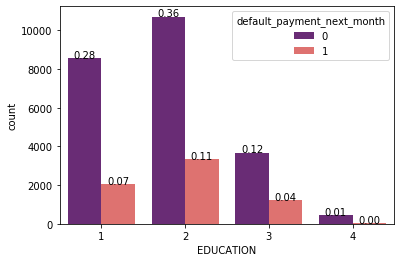

In [18]:
total = float(len(data))
ax=sns.countplot(x='EDUCATION',hue='default_payment_next_month',data=data,palette = 'magma')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

- More number of default is 2 education

#### Total perecentage of default and non default with respect to male and female

In [19]:
total = float(len(data))
ax=sns.countplot(x='SEX',hue='default_payment_next_month',data=data,palette = 'magma')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.show()

- more number of default is 2.

#### Histogram Plot

In [20]:
fig, axarr = plt.subplots(5, 3, figsize=(16, 18))
data['LIMIT_BAL'].plot.hist(ax=axarr[0][0],title='Limit Balance')
data['BILL_AMT1'].plot.hist(ax=axarr[0][1], title='Bill amount 1')
data['BILL_AMT2'].plot.hist(ax=axarr[0][2], title='Bill amount 2')
data['BILL_AMT3'].plot.hist(ax=axarr[1][0], title='Bill amount 3')
data['BILL_AMT4'].plot.hist(ax=axarr[1][1], title='Bill amount 4')
data['BILL_AMT5'].plot.hist(ax=axarr[1][2], title='Bill amount 5')
data['BILL_AMT6'].plot.hist(ax=axarr[2][0], title='Bill amount 6')
data['PAY_AMT1'].plot.hist(ax=axarr[2][1], title='Pay amount 1')
data['PAY_AMT2'].plot.hist(ax=axarr[2][2], title='Pay amount 2')
data['PAY_AMT3'].plot.hist(ax=axarr[3][0], title='Pay amount 3')
data['PAY_AMT4'].plot.hist(ax=axarr[3][1], title='Pay amount 4')
data['PAY_AMT5'].plot.hist(ax=axarr[3][2], title='Pay amount 5')
data['PAY_AMT6'].plot.hist(ax=axarr[4][0], title='Pay amount 6')
data['AGE'].plot.hist(ax=axarr[4][1],title='Age')
data['EDUCATION'].plot.hist(ax=axarr[4][2],title='Age')

In [21]:
data[['SEX','MARRIAGE','EDUCATION']] = data[['SEX','MARRIAGE','EDUCATION']].astype('object')
data=pd.get_dummies(data,drop_first=True)
data.head()

LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  BILL_AMT1  \
0      20000   24      2      2      0      0      0      0       3913   
1     120000   26      0      2      0      0      0      2       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57      0      0      0      0      0      0       8617   

   BILL_AMT2  ...  PAY_AMT4  PAY_AMT5  PAY_AMT6  default_payment_next_month  \
0       3102  ...         0         0         0                           1   
1       1725  ...      1000         0      2000                           1   
2      14027  ...      1000      1000      5000                           0   
3      48233  ...      1100      1069      1000                           0   
4       5670  ...      9000       689       679                           0   

   SEX_2  EDUCATION_2  EDUCATION_3  EDUCATION_4  MARRIAGE_2  MARRIAGE_3  
0      1            1            0            0           0           0  
1      1            1            0            0           1           0  
2      1            1            0            0           1           0  
3      1            1            0            0           0           0  
4      0            1            0            0           0           0  

[5 rows x 27 columns]

In [22]:
data.columns

Index(['LIMIT_BAL', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default_payment_next_month',
       'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2',
       'MARRIAGE_3'],
      dtype='object')

In [23]:
data = data[['LIMIT_BAL','AGE','SEX_2','EDUCATION_2','EDUCATION_3','EDUCATION_4','MARRIAGE_2','MARRIAGE_3','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1',
             'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
            'PAY_AMT5','PAY_AMT6','default_payment_next_month']]
data

LIMIT_BAL  AGE  SEX_2  EDUCATION_2  EDUCATION_3  EDUCATION_4  \
0          20000   24      1            1            0            0   
1         120000   26      1            1            0            0   
2          90000   34      1            1            0            0   
3          50000   37      1            1            0            0   
4          50000   57      0            1            0            0   
...          ...  ...    ...          ...          ...          ...   
29995     220000   39      0            0            1            0   
29996     150000   43      0            0            1            0   
29997      30000   37      0            1            0            0   
29998      80000   41      0            0            1            0   
29999      50000   46      0            1            0            0   

       MARRIAGE_2  MARRIAGE_3  PAY_1  PAY_2  ...  BILL_AMT4  BILL_AMT5  \
0               0           0      2      2  ...          0          0   
1               1           0      0      2  ...       3272       3455   
2               1           0      0      0  ...      14331      14948   
3               0           0      0      0  ...      28314      28959   
4               0           0      0      0  ...      20940      19146   
...           ...         ...    ...    ...  ...        ...        ...   
29995           0           0      0      0  ...      88004      31237   
29996           1           0      0      0  ...       8979       5190   
29997           1           0      4      3  ...      20878      20582   
29998           0           0      1      0  ...      52774      11855   
29999           0           0      0      0  ...      36535      32428   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0              0         0       689         0         0         0         0   
1           3261         0      1000      1000      1000         0      2000   
2          15549      1518      1500      1000      1000      1000      5000   
3          29547      2000      2019      1200      1100      1069      1000   
4          19131      2000     36681     10000      9000       689       679   
...          ...       ...       ...       ...       ...       ...       ...   
29995      15980      8500     20000      5003      3047      5000      1000   
29996          0      1837      3526      8998       129         0         0   
29997      19357         0         0     22000      4200      2000      3100   
29998      48944     85900      3409      1178      1926     52964      1804   
29999      15313      2078      1800      1430      1000      1000      1000   

       default_payment_next_month  
0                               1  
1                               1  
2                               0  
3                               0  
4                               0  
...                           ...  
29995                           0  
29996                           0  
29997                           1  
29998                           1  
29999                           1  

[30000 rows x 27 columns]

In [24]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

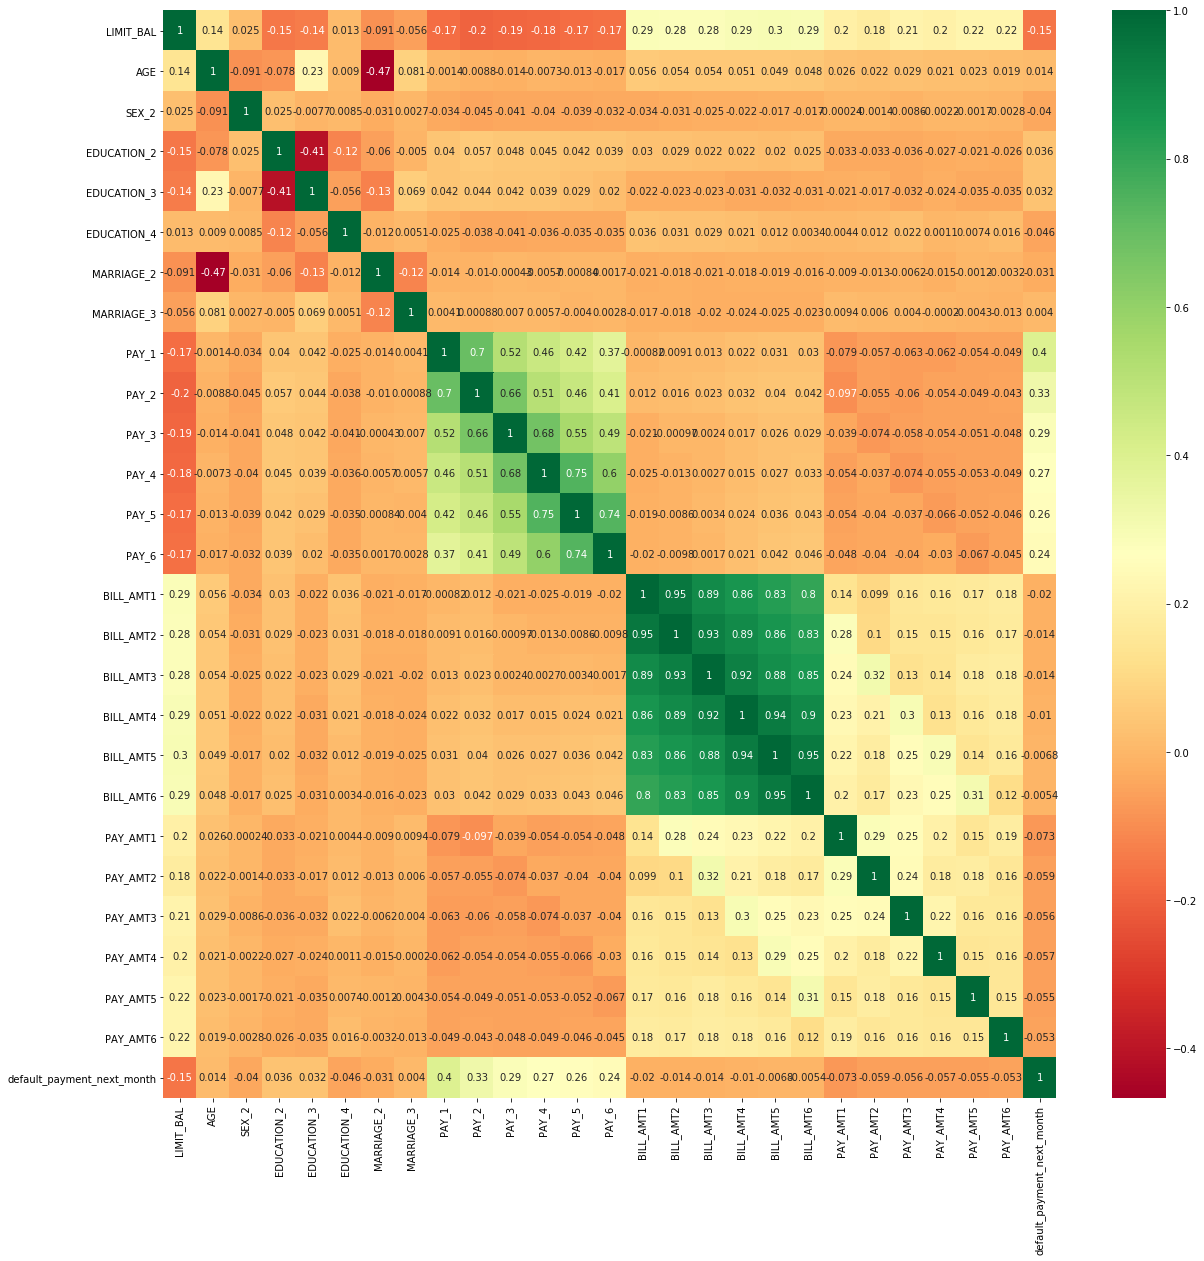

In [25]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
data.drop(['AGE','SEX_2','EDUCATION_2','EDUCATION_3','EDUCATION_4','MARRIAGE_2','MARRIAGE_3','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4',
            'PAY_AMT5','PAY_AMT6',],axis=1,inplace=True)

In [27]:
data.columns

Index(['LIMIT_BAL', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'default_payment_next_month'],
      dtype='object')

In [28]:
X=data.iloc[:,0:7]
y=data.iloc[:,-1]

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample 
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.model_selection import KFold,GridSearchCV,RandomizedSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestClassifier ,ExtraTreesClassifier, AdaBoostClassifier,GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import plotly.figure_factory as ff 

import warnings
warnings.filterwarnings("ignore")

import random
random.seed(10)

In [31]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy:', accuracy_score(y_pred,y_test))

cv_scores = cross_val_score(LR, X, y, cv=5)
print()
print(classification_report(y_test, y_pred))
print()
print("Average 5-Fold CV Score: {}".format(round(np.mean(cv_scores),4)),
      ", Standard deviation: {}".format(round(np.std(cv_scores),4)))

Accuracy: 0.7787777777777778

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000


Average 5-Fold CV Score: 0.7788 , Standard deviation: 0.0001


In [32]:

#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["default_payment_next_month"]]
# Store the variable we are predicting 
target = "default_payment_next_month"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(30000, 7)
(30000,)


In [33]:

## Get the Fraud and the normal dataset 

fraud = data[data['default_payment_next_month']==1]

normal = data[data['default_payment_next_month']==0]

In [34]:
print(fraud.shape,normal.shape)

(6636, 8) (23364, 8)


In [35]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


 # Implementing Oversampling for Handling Imbalanced 

In [36]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [37]:
print(fraud.shape,normal.shape)

(6636, 8) (23364, 8)


In [38]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_sample(X,Y)

In [39]:
X_res.shape,y_res.shape

((46704, 7), (46704,))

In [40]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({1: 23352, 0: 23352})


# RandomOverSampler to handle imbalanced data

In [41]:
from imblearn.over_sampling import RandomOverSampler

In [42]:
os=RandomOverSampler(sampling_strategy=0.5)

In [43]:
X_train_res, y_train_res = os.fit_sample(X, Y)

In [46]:
X_train_res.shape,y_train_res.shape

((35046, 7), (35046,))

In [47]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({0: 23364, 1: 11682})


In [48]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
os_us = SMOTETomek(sampling_strategy=1)

X_train_res1, y_train_res1 = os_us.fit_sample(X, Y)

In [49]:
X_train_res1.shape,y_train_res1.shape

((46688, 7), (46688,))

In [50]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res1)))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({1: 23344, 0: 23344})


# Handling Imbalanced Data- Under Sampling

In [51]:

## Get the Fraud and the normal dataset 

fraud = data[data['default_payment_next_month']==1]

normal = data[data['default_payment_next_month']==0]

In [52]:
print(fraud.shape,normal.shape)

(6636, 8) (23364, 8)


In [53]:
from imblearn.under_sampling import NearMiss

In [54]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(sampling_strategy=1)
X_res,y_res=nm.fit_sample(X,Y)

In [55]:
X_res.shape,y_res.shape

((13272, 7), (13272,))

In [56]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 23364, 1: 6636})
Resampled dataset shape Counter({0: 6636, 1: 6636})


In [57]:
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .1,
                                                  random_state=12)

In [58]:
from imblearn.over_sampling import SMOTE 
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE(random_state=12, sampling_strategy= 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [60]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(n_estimators=25, random_state=12)

In [61]:
# Predicting the Test set results
y_pred = clf_rf.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

-0.18861313347644648

# logistic regression

In [62]:
X=data.iloc[:,0:7]
y=data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y, random_state=42)

In [63]:
# create the training df by remerging X_train and y_train
df_train = X_train.join(y_train)

##### We have observed that there is imbalance in the samples. Let's see the distribution of the samples in the train dataset

In [64]:
# Separate majority and minority classes
df_majority = df_train[df_train.default_payment_next_month == 0]
df_minority = df_train[df_train.default_payment_next_month == 1]

print(df_majority.default_payment_next_month.count())
print("-----------")
print(df_minority.default_payment_next_month.count())
print("-----------")
print(df_train.default_payment_next_month.value_counts())

16355
-----------
4645
-----------
0    16355
1     4645
Name: default_payment_next_month, dtype: int64


# A) Random Oversampling:
Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.
Examples from the training dataset are selected randomly with replacement. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

In [65]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples = 16355,    # to match majority class
                                 random_state= 42) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.default_payment_next_month.value_counts()

1    16355
0    16355
Name: default_payment_next_month, dtype: int64

# B) Random Undersampling:
Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.
This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.
This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit

In [66]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4645,     # to match minority class
                                 random_state=587) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.default_payment_next_month.value_counts()

1    4645
0    4645
Name: default_payment_next_month, dtype: int64

# C) SMOTE: Synthetic Minority Oversampling Technique
The upsample has the disadvantage of increasing the likelihood of overfitting since it replicates the minority class event. It usually outperform the downsampling. The downsample can discard potentially useful information and the sample can be biased, but it helps improving the run time
SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. To create a syntetic sample I want to use the SMOTE algorithm, which is an oversampling method which creates syntetic samples from the minority class instead of creating copies. It selects 2 or more similar instances and perturb them one at a time by random amount. This techniques should avoid overfitting problems but it risks adding noise to the model

In [67]:
sm = SMOTE(random_state=42)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)
print(len(y_SMOTE))
print(y_SMOTE.sum())

32710
16355


# So we have 4 sets of training data:
- 1) The normal train data with unbalance
- 2) Train data with oversampling
- 3) Train data with undersampling
- 4) Train data with SMOTE algorithm
- The evaluation will be based on K fold cross validation of AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve score which is considered as the best metric for binary classification and also the test score
AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.
First let's define a function which evaluates the model with train and test score and also performs a K-fold cross validation on the train dataset

In [68]:
def model_eval(algo, Xtrain,ytrain,Xtest,ytest):
    from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

    algo.fit(Xtrain,ytrain)
    y_pred = algo.predict(Xtrain)
    y_train_prob = algo.predict_proba(Xtrain)[:,1]

    #print('confusion matrix-train\n',confusion_matrix(ytrain,y_pred))
    print('Overall Train Accuracy',accuracy_score(ytrain,y_pred))
    print('Train AUC Score',roc_auc_score(ytrain,y_train_prob))

    y_test_pred = algo.predict(Xtest)
    y_test_prob = algo.predict_proba(Xtest)[:,1]


    #print('confusion matrix-test\n',confusion_matrix(ytest,y_test_pred))
    print('Overall Test Accuracy',accuracy_score(ytest,y_test_pred))
    print('Test AUC Score',roc_auc_score(ytest,y_test_prob))
    print('Classification Report of Test\n',  classification_report(ytest, y_test_pred))
    
    
    kf = KFold(n_splits = 5,shuffle = True,random_state = 42)
    score=[]
    for train_idx,test_idx in kf.split(Xtrain,ytrain):
        xtrain_k,xtest_k = Xtrain.iloc[train_idx,:],Xtrain.iloc[test_idx,:]
        ytrain_k,ytest_k = ytrain.iloc[train_idx],ytrain.iloc[test_idx]
        algo.fit(xtrain_k,ytrain_k)
        y_pred_k = algo.predict(xtest_k)
        roc = roc_auc_score(ytest_k,y_pred_k)
        score.append(roc)
    print('K-Fold scores: %0.03f (+/- %0.5f)' % (np.mean(score),np.var(score,ddof=1)))
    
    f,ax =  plt.subplots(1,2,figsize=(14,6))
    #plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(ytest,y_test_pred)
    sns.heatmap(ConfMatrix,annot=True, cmap='YlGnBu', fmt="d", 
            xticklabels = ['Non-default', 'Default'], 
            yticklabels = ['Non-default', 'Default'],linewidths=.5,ax = ax[0])
    ax[0].set_ylabel('True label')
    ax[0].set_xlabel('Predicted label')
    ax[0].set_title('Confusion Matrix')

    global fpr,tpr,thresholds
    fpr,tpr,thresholds = roc_curve(ytest,y_test_prob)
    ax[1].plot(fpr,tpr,color = 'r')
    ax[1].plot(fpr,fpr,color = 'green')
    ax[1].set_ylabel('TPR')
    ax[1].set_xlabel('FPR')
    ax[1].set_title('ROC Curve')
    plt.show()

In [69]:
xtrain_data = [X_train,df_upsampled.drop('default_payment_next_month',axis = 1),df_downsampled.drop('default_payment_next_month',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default_payment_next_month'],df_downsampled['default_payment_next_month'],y_SMOTE]

In [163]:
xtrain_data = [X_train,df_upsampled.drop('default_payment_next_month',axis = 1),df_downsampled.drop('default_payment_next_month',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default_payment_next_month'],df_downsampled['default_payment_next_month'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_log
    print('Data is ',k)
    best_log = []
    # Setup the hyperparameter grid, (not scaled data)
    param_grid = {'C': np.logspace(-5, 8, 15)}
    # Instantiate a logistic regression classifier
    logreg = LogisticRegression()
    # Instantiate the RandomizedSearchCV object
    logreg_cv = RandomizedSearchCV(logreg, param_grid ,scoring = 'roc_auc', cv=5, random_state=0)
    # Fit it to the data
    logreg_cv.fit(i,j)
    best_log.append(logreg_cv.best_params_)
    # Print the tuned parameters and score
    print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
    print("_" * 100)

Data is  Normal Sampling
Tuned Logistic Regression Parameters: {'C': 8.483428982440725e-05}
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Logistic Regression Parameters: {'C': 8.483428982440725e-05}
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Logistic Regression Parameters: {'C': 8.483428982440725e-05}
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Logistic Regression Parameters: {'C': 8.483428982440725e-05}
____________________________________________________________________________________________________


In [170]:
param_log =[{'C':  8.483428982440725e-05},{'C':  8.483428982440725e-05},{'C':  8.483428982440725e-05},{'C':  8.483428982440725e-05}]

Data is  Normal Sampling  And with hyper parameter  {'C': 8.483428982440725e-05}
Overall Train Accuracy 0.7788095238095238
Train AUC Score 0.6319182271446996
Overall Test Accuracy 0.7787777777777778
Test AUC Score 0.6154728665927764
Classification Report of Test
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000

K-Fold scores: 0.517 (+/- 0.00151)


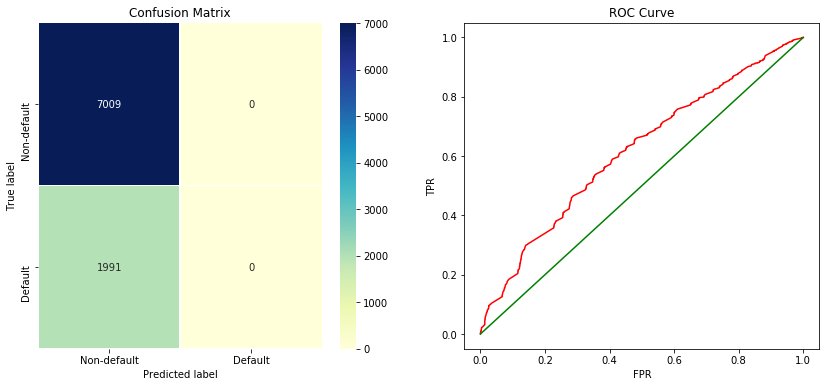

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'C': 8.483428982440725e-05}
Overall Train Accuracy 0.5
Train AUC Score 0.6297128943465364
Overall Test Accuracy 0.7787777777777778
Test AUC Score 0.615435317109329
Classification Report of Test
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000

K-Fold scores: 0.500 (+/- 0.00000)


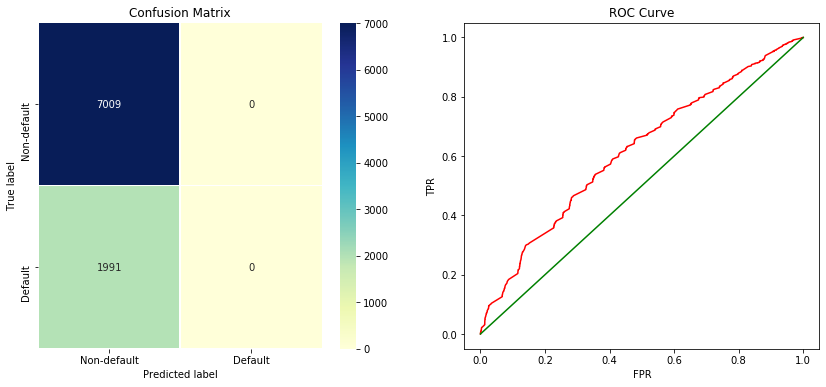

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'C': 8.483428982440725e-05}
Overall Train Accuracy 0.5
Train AUC Score 0.6318827726608585
Overall Test Accuracy 0.7787777777777778
Test AUC Score 0.6154357470652463
Classification Report of Test
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000

K-Fold scores: 0.500 (+/- 0.00000)


____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'C': 8.483428982440725e-05}
Overall Train Accuracy 0.5
Train AUC Score 0.6321830103086694
Overall Test Accuracy 0.7787777777777778
Test AUC Score 0.6154349588127311
Classification Report of Test
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.00      0.00      0.00      1991

    accuracy                           0.78      9000
   macro avg       0.39      0.50      0.44      9000
weighted avg       0.61      0.78      0.68      9000

K-Fold scores: 0.500 (+/- 0.00000)


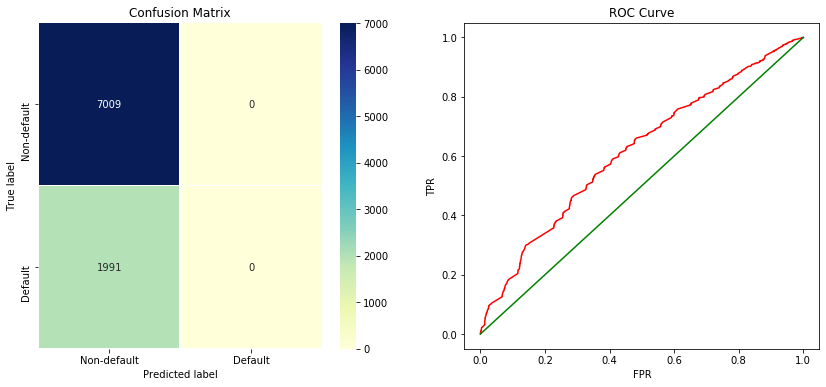

____________________________________________________________


In [171]:
xtrain_data = [X_train,df_upsampled.drop('default_payment_next_month',axis = 1),df_downsampled.drop('default_payment_next_month',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default_payment_next_month'],df_downsampled['default_payment_next_month'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_log[l])
    model_eval(LogisticRegression(**param_log[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

In [172]:
xtrain_data = [X_train,df_upsampled.drop('default_payment_next_month',axis = 1),df_downsampled.drop('default_payment_next_month',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default_payment_next_month'],df_downsampled['default_payment_next_month'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    print('Data is ',k)
    # Instantiate a Decision Tree classifier: tree
    dtc = DecisionTreeClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'max_depth': sp_randint(2,20),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,40),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object: tree_cv
    rsearch_dt = RandomizedSearchCV(dtc, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 100,n_jobs = -1)

    # Fit it to the data
    rsearch_dt.fit(i,j)
    print("Tuned Decision Tree Parameters: {}".format(rsearch_dt.best_params_), "for",name)
    print("_" * 100) 

Data is  Normal Sampling
Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 11} for ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3} for ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 32} for ['Normal Sampling', 'Over Sampling', 'Under Sampling', 'SMOTE']
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Decision Tree Parameters: {'criterion'

In [173]:
param_dt = [{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 11},
           {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3},
           {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 32},
           {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 5, 'min_samples_split': 36}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 11}
Overall Train Accuracy 0.8249047619047619
Train AUC Score 0.7604505457655576
Overall Test Accuracy 0.8151111111111111
Test AUC Score 0.7355489128958757
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.65      0.36      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.82      0.79      9000

K-Fold scores: 0.660 (+/- 0.00002)


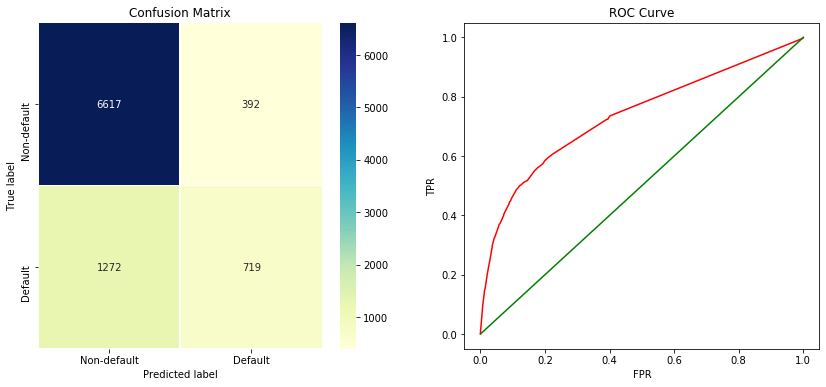

____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3}
Overall Train Accuracy 0.7388871904616325
Train AUC Score 0.8036207910301107
Overall Test Accuracy 0.7648888888888888
Test AUC Score 0.6890973713283466
Classification Report of Test
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      7009
           1       0.47      0.49      0.48      1991

    accuracy                           0.76      9000
   macro avg       0.66      0.67      0.66      9000
weighted avg       0.77      0.76      0.77      9000

K-Fold scores: 0.720 (+/- 0.00001)


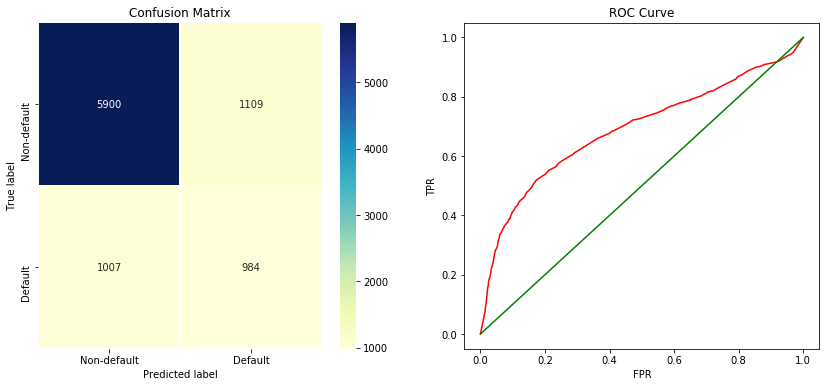

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 32}
Overall Train Accuracy 0.7135629709364909
Train AUC Score 0.765422152597617
Overall Test Accuracy 0.7476666666666667
Test AUC Score 0.7370613903240857
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      7009
           1       0.45      0.59      0.51      1991

    accuracy                           0.75      9000
   macro avg       0.66      0.69      0.67      9000
weighted avg       0.78      0.75      0.76      9000

K-Fold scores: 0.704 (+/- 0.00019)


____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 5, 'min_samples_split': 36}
Overall Train Accuracy 0.7229593396514827
Train AUC Score 0.7834221900003935
Overall Test Accuracy 0.7684444444444445
Test AUC Score 0.7131712839035468
Classification Report of Test
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      7009
           1       0.48      0.51      0.49      1991

    accuracy                           0.77      9000
   macro avg       0.67      0.68      0.67      9000
weighted avg       0.77      0.77      0.77      9000

K-Fold scores: 0.708 (+/- 0.00002)


____________________________________________________________


In [174]:
xtrain_data = [X_train,df_upsampled.drop('default_payment_next_month',axis = 1),df_downsampled.drop('default_payment_next_month',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default_payment_next_month'],df_downsampled['default_payment_next_month'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(DecisionTreeClassifier(**param_dt[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

# Random Forest

In [176]:
xtrain_data = [X_train,df_upsampled.drop('default_payment_next_month',axis = 1),df_downsampled.drop('default_payment_next_month',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default_payment_next_month'],df_downsampled['default_payment_next_month'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']

for i,j,k in zip(xtrain_data,ytrain_data,name):
    global best_rf
    best_rf =[]
    print('Data is ',k)
    # Instantiate a Random forest classifier: tree
    rfc = RandomForestClassifier(random_state = 42)

    # Setup the parameters and distributions to sample from: param_dist
    params = {'n_estimators' : sp_randint(50,200),
              'max_features' : sp_randint(1,24),'max_depth': sp_randint(2,10),
             'min_samples_leaf':sp_randint(1,20),
             'min_samples_split':sp_randint(2,20),
             'criterion':['gini','entropy']}

    # Instantiate the RandomizedSearchCV object
    rsearch_rfc = RandomizedSearchCV(rfc, param_distributions= params, cv = 5, scoring = 'roc_auc',n_iter = 200,random_state = 42,n_jobs = -1,return_train_score = True)

    # Fit it to the data
    rsearch_rfc.fit(i,j)
    best_rf.append(rsearch_rfc.best_params_)
    print("Tuned Random Tree Parameters: {}".format(rsearch_rfc.best_params_), "for",k)
    print("_" * 100)

Data is  Normal Sampling
Tuned Random Tree Parameters: {'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 13, 'min_samples_split': 11, 'n_estimators': 138} for Normal Sampling
____________________________________________________________________________________________________
Data is  Over Sampling
Tuned Random Tree Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 11, 'n_estimators': 150} for Over Sampling
____________________________________________________________________________________________________
Data is  Under Sampling
Tuned Random Tree Parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 15, 'min_samples_split': 8, 'n_estimators': 57} for Under Sampling
____________________________________________________________________________________________________
Data is  SMOTE
Tuned Random Tree Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features'

In [177]:
param_rf = [{'criterion': 'gini', 'max_depth': 7, 'max_features': 4, 'min_samples_leaf': 13, 'min_samples_split': 11, 'n_estimators': 138},
           {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 11, 'n_estimators': 150},
           {'criterion': 'entropy', 'max_depth': 6, 'max_features': 2, 'min_samples_leaf': 15, 'min_samples_split': 8, 'n_estimators': 57},
           {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 4, 'min_samples_split': 11, 'n_estimators': 150}]

Data is  Normal Sampling  And with hyper parameter  {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 11}
Overall Train Accuracy 0.8245714285714286
Train AUC Score 0.7666831887622545
Overall Test Accuracy 0.8166666666666667
Test AUC Score 0.7428001552714137
Classification Report of Test
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.66      0.36      0.46      1991

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000

K-Fold scores: 0.664 (+/- 0.00003)


____________________________________________________________
Data is  Over Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 3}
Overall Train Accuracy 0.7261693671660043
Train AUC Score 0.7811970288915094
Overall Test Accuracy 0.7611111111111111
Test AUC Score 0.7332742669448672
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      7009
           1       0.47      0.56      0.51      1991

    accuracy                           0.76      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.76      0.77      9000

K-Fold scores: 0.718 (+/- 0.00001)


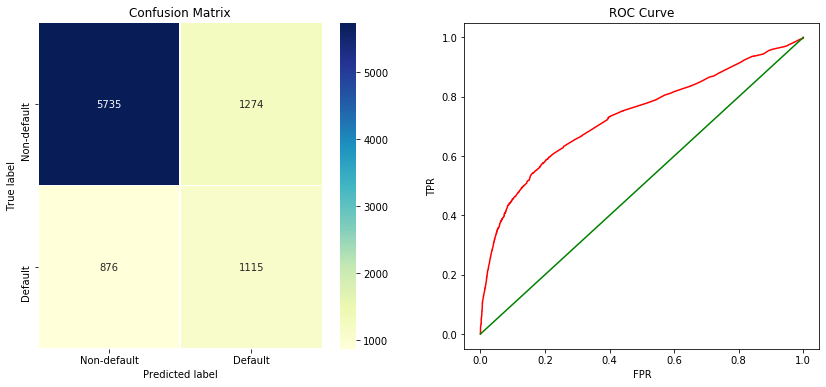

____________________________________________________________
Data is  Under Sampling  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 19, 'min_samples_split': 32}
Overall Train Accuracy 0.7091496232508073
Train AUC Score 0.7658166413878368
Overall Test Accuracy 0.7527777777777778
Test AUC Score 0.7430855743412055
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.80      0.83      7009
           1       0.46      0.60      0.52      1991

    accuracy                           0.75      9000
   macro avg       0.66      0.70      0.68      9000
weighted avg       0.78      0.75      0.76      9000

K-Fold scores: 0.707 (+/- 0.00024)


____________________________________________________________
Data is  SMOTE  And with hyper parameter  {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 5, 'min_samples_split': 36}
Overall Train Accuracy 0.7198104555181901
Train AUC Score 0.7733116692731892
Overall Test Accuracy 0.764
Test AUC Score 0.7370882267392596
Classification Report of Test
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      7009
           1       0.47      0.56      0.51      1991

    accuracy                           0.76      9000
   macro avg       0.67      0.69      0.68      9000
weighted avg       0.78      0.76      0.77      9000

K-Fold scores: 0.712 (+/- 0.00001)


____________________________________________________________


In [179]:
xtrain_data = [X_train,df_upsampled.drop('default_payment_next_month',axis = 1),df_downsampled.drop('default_payment_next_month',axis = 1),X_SMOTE]
ytrain_data = [y_train,df_upsampled['default_payment_next_month'],df_downsampled['default_payment_next_month'],y_SMOTE]
name = ['Normal Sampling' , 'Over Sampling' , 'Under Sampling' , 'SMOTE']
index = [0,1,2,3]

for i,j,k,l in zip(xtrain_data,ytrain_data,name,index):
    print('Data is ',k,' And with hyper parameter ',param_dt[l])
    model_eval(RandomForestClassifier(**param_rf[l],random_state= 42), i,j,X_test,y_test)
    print("_" * 60)

In [ ]:
@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        LIMIT_BAL = int(request.form['LIMIT_BAL'])
        PAY_1 = int(request.form['PAY_1'])
        PAY_2 = int(request.form['PAY_2'])
        PAY_3 = int(request.form['PAY_3'])
        PAY_4 = int(request.form['PAY_4'])
        PAY_5 = int(request.form['PAY_5'])
        PAY_6 = int(request.form['PAY_6'])
        
        
        data = np.array([[LIMIT_BAL, PAY_1, PAY_2, PAY_3, PAY_4,PAY_5, PAY_6]])
        my_prediction = model.predict(data)
        
        return render_template('index.html', prediction=my_prediction)

if __name__ == '__main__':
    app.run(debug=True)